# SRFlow Jupyter Notebook Implementation (PyTorch) 

### SRFlow Official Github (Python + PyTorch): https://github.com/andreas128/SRFlow

### 1. Import Libraries

In [1]:
import os
from os.path import basename
import math
import argparse
import random
import logging
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle


import torch
import torch.distributed as dist
import torch.multiprocessing as mp

import options.options as option
from utils import util
from data import create_dataloader, create_dataset
from models import create_model
from utils.timer import Timer, TickTock
from utils.util import get_resume_paths

In [2]:
## version check 
print('pytorch + cuda version =', torch.__version__)
## GPU count
print('gpu num =', torch.cuda.device_count())

pytorch + cuda version = 1.8.1+cu101
gpu num = 8


In [ ]:
## Official code run 
!python train.py -opt ./confs/SRFlow_seismic.yml

OrderedDict([('manual_seed', 10), ('lr_G', 0.00025), ('weight_decay_G', 0), ('beta1', 0.9), ('beta2', 0.99), ('lr_scheme', 'MultiStepLR'), ('warmup_iter', -1), ('lr_steps_rel', [0.5, 0.75, 0.9, 0.95]), ('lr_gamma', 0.5), ('niter', 200000), ('val_freq', 1000), ('lr_steps', [100000, 150000, 180000, 190000])])
Disabled distributed training.
21-07-28 17:52:12.908 - INFO:   name: train
  use_tb_logger: True
  model: SRFlow
  distortion: sr
  scale: 4
  gpu_ids: [1]
  datasets:[
    train:[
      name: CelebA_160_tr
      mode: LRHR_PKL
      dataroot_GT: /sep/minjun/srflow/datasets/mj_data/pkls/hr.pklv4
      dataroot_LQ: /sep/minjun/srflow/datasets/mj_data/pkls/lr_X4.pklv4
      quant: 32
      use_shuffle: True
      n_workers: 3
      batch_size: 50
      GT_size: 160
      use_flip: True
      color: RGB
      phase: train
      scale: 4
      data_type: img
    ]
    val:[
      name: CelebA_160_va
      mode: LRHR_PKL
      dataroot_GT: /sep/minjun/srflow/datasets/mj_data_test/pkls/hr

In [4]:
## Official code run 
!python train.py -opt ./confs/SRFlow_seismic.yml
\

OrderedDict([('manual_seed', 10), ('lr_G', 0.00025), ('weight_decay_G', 0), ('beta1', 0.9), ('beta2', 0.99), ('lr_scheme', 'MultiStepLR'), ('warmup_iter', -1), ('lr_steps_rel', [0.5, 0.75, 0.9, 0.95]), ('lr_gamma', 0.5), ('niter', 20), ('val_freq', 50), ('lr_steps', [10, 15, 18, 19])])
Disabled distributed training.
21-07-13 22:22:00.966 - INFO:   name: train
  use_tb_logger: True
  model: SRFlow
  distortion: sr
  scale: 4
  gpu_ids: [0]
  datasets:[
    train:[
      name: CelebA_160_tr
      mode: LRHR_PKL
      dataroot_GT: /sep/minjun/srflow/datasets/mj_data/pkls/hr.pklv4
      dataroot_LQ: /sep/minjun/srflow/datasets/mj_data/pkls/lr_X4.pklv4
      quant: 32
      use_shuffle: True
      n_workers: 4
      batch_size: 50
      GT_size: 160
      use_flip: True
      color: RGB
      phase: train
      scale: 4
      data_type: img
    ]
    val:[
      name: CelebA_160_va
      mode: LRHR_PKL
      dataroot_GT: /sep/minjun/srflow/datasets/mj_data_test/pkls/hr.pklv4
      dataroot_

21-07-13 22:22:02.286 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB2.conv3.bias] will not optimize.
module.RRDB.RRDB_trunk.7.RDB2.conv4.weight True
opt module.RRDB.RRDB_trunk.7.RDB2.conv4.weight
21-07-13 22:22:02.286 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB2.conv4.weight] will not optimize.
module.RRDB.RRDB_trunk.7.RDB2.conv4.bias True
opt module.RRDB.RRDB_trunk.7.RDB2.conv4.bias
21-07-13 22:22:02.286 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB2.conv4.bias] will not optimize.
module.RRDB.RRDB_trunk.7.RDB2.conv5.weight True
opt module.RRDB.RRDB_trunk.7.RDB2.conv5.weight
21-07-13 22:22:02.286 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB2.conv5.weight] will not optimize.
module.RRDB.RRDB_trunk.7.RDB2.conv5.bias True
opt module.RRDB.RRDB_trunk.7.RDB2.conv5.bias
21-07-13 22:22:02.286 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB2.conv5.bias] will not optimize.
module.RRDB.RRDB_trunk.7.RDB3.conv1.weight True
opt module.RRDB.RRDB_trunk.7.RDB3.conv1.weight
21-07-13 22:22:02.2

21-07-13 22:22:02.338 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.4.bias] will not optimize.
module.flowUpsamplerNet.layers.25.affine.fAffine.4.logs True
21-07-13 22:22:02.338 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.4.logs] will not optimize.
module.flowUpsamplerNet.layers.25.affine.fFeatures.0.weight True
21-07-13 22:22:02.338 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fFeatures.0.weight] will not optimize.
module.flowUpsamplerNet.layers.25.affine.fFeatures.0.actnorm.bias True
21-07-13 22:22:02.338 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fFeatures.0.actnorm.bias] will not optimize.
module.flowUpsamplerNet.layers.25.affine.fFeatures.0.actnorm.logs True
21-07-13 22:22:02.338 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fFeatures.0.actnorm.logs] will not optimize.
module.flowUpsamplerNet.layers.25.affine.fFeatures.2.weight True
21-07-13 22:22:02.338 - WARNING: Params [module.flowUpsamp

/sep/minjun/anaconda3/envs/srflow/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/sep/minjun/anaconda3/envs/srflow/lib/python3.7/site-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.

In [4]:

# define function of ricker wavelet
def ricker(f, length, dt):
    t0 = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t0**2)) * np.exp(-(np.pi**2)*(f**2)*(t0**2))
    return t0, y


def gen2d(l,x,ratio):
    geo = []
    for i in range(l):
        ran = random.randint(1,30)
        ai = random.gauss(0.5*1e7+i/100*1e7, random.gauss(i*0.01,i*0.005)*2329247)
        for j in range(ran):
            geo.append(ai)    
            
    geo_2d = np.zeros(shape=[x,l])
    for i in range(x):
        geo_2d[i,:] = geo[:l]

    
    ### squeeze ###
    img = geo_2d.T
    A = img.shape[0] / 10.0
    w = (random.randint(0,20)/10+0.01) / img.shape[1]

    shift = lambda z: A * np.sin(1.0*np.pi*z * w) 

    for i in range(img.shape[0]):
        img[:,i] = np.roll(img[:,i], int(shift(i)))
    
    geo_2d = img[:].T 
    
    
    
    l_t = int(l/ratio)
    ref_2d = np.zeros(shape=[x,l_t])
    
    for i in range(x):
        ai_avg = []
        ref_avg= []
        
        for j in range(0, l, ratio):
            slice_from_index = j
            slice_to_index = slice_from_index + ratio
            ai_avg.append(np.mean(geo_2d[i,slice_from_index:slice_to_index]))

        for k in range(l_t-1):
            ref_avg.append((ai_avg[k+1]-ai_avg[k])/(ai_avg[k]+ai_avg[k+1]))
            
        ref_avg.append(ref_avg[-1])
        ref_2d[i,:] = ref_avg
    
    
    f=100  #20         #wavelet frequency
    length=0.1#0.512    #Wavelet vector length
    dt=0.001  # Sampling prefer to use smiliar to resampled AI
    t0, w = ricker (f, length, dt) # ricker wavelet 
    
    syn_2d = np.zeros(shape=[x,l_t]) 
    for i in range(x):
        syn_2d[i,:] = np.convolve(w, ref_2d[i,:], mode='same')
    
    
    return geo_2d, ref_2d, syn_2d

In [5]:
from matplotlib.ticker import LinearLocator,AutoLocator
geo2d,ref2d,syn2d= gen2d(1000,1000,1)

In [6]:
for i in range(200):
        geo2d,ref2d,syn2d= gen2d(1000,1000,1)
        np.save('/sep/minjun/srflow/datasets/mj_data/hr/hr%d.npy'%i,geo2d)
        np.save('/sep/minjun/srflow/datasets/mj_data/lr/lr%d.npy'%i,syn2d)

In [7]:
for i in range(10):
        geo2d,ref2d,syn2d= gen2d(1000,1000,1)
        np.save('/sep/minjun/srflow/datasets/mj_data_test/hr/hr%d.npy'%i,geo2d)
        np.save('/sep/minjun/srflow/datasets/mj_data_test/lr/lr%d.npy'%i,syn2d)

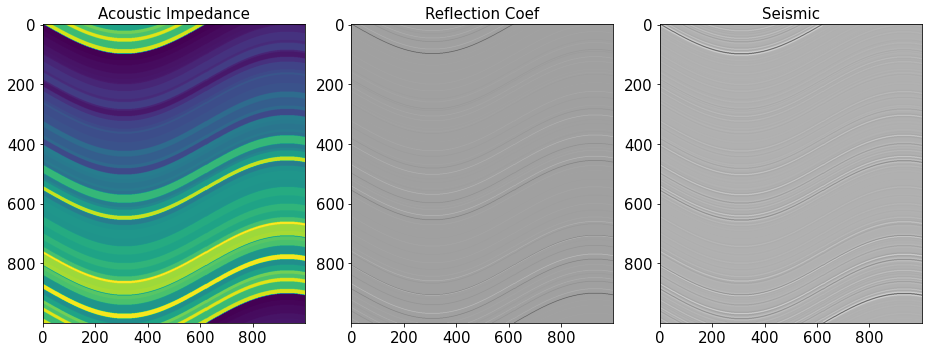

In [6]:
fig, ax = plt.subplots(1,3,figsize=(13,5))
v=0.2
ax[0].imshow(geo2d.T,aspect='auto')#,extent=[0,nx*dx/100,((nt-1)*dt*10),0.0])
ax[0].tick_params(labelsize=15)
ax[0].set_title('Acoustic Impedance', fontsize=15)

ax[1].imshow(ref2d.T,cmap='gray',aspect='auto')#,extent=[0,nx*dx/100,((nt-1)*dt*10),0.0])
ax[1].tick_params(labelsize=15)
ax[1].set_title('Reflection Coef',fontsize=15)

ax[2].imshow(syn2d.T,cmap='gray',aspect='auto')#,extent=[0,nx*dx/100,((nt-1)*dt*10),0.0])
ax[2].tick_params(labelsize=15)
ax[2].set_title('Seismic',fontsize=15)
plt.tight_layout()
plt.show()

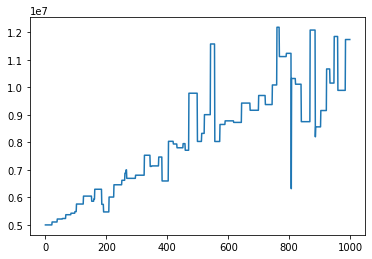

In [7]:
#plt.plot(geo2d[0,:])
plt.plot(geo2d[0,:])

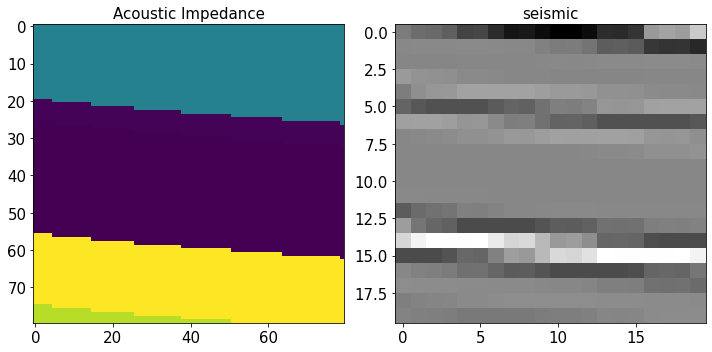

In [32]:
from prepare_data_seismic import *
hr_crop, lr_crop = random_crop_same(geo2d,syn2d, 80)
lr_crop = imresize(lr_crop, scalar_scale=0.25)  

fig, ax = plt.subplots(1,2,figsize=(10,5))
v=0.2
ax[0].imshow(hr_crop.T,aspect='auto')#,extent=[0,nx*dx/100,((nt-1)*dt*10),0.0])
ax[0].tick_params(labelsize=15)
ax[0].set_title('Acoustic Impedance', fontsize=15)

ax[1].imshow(lr_crop.T,cmap='gray',aspect='auto')#,extent=[0,nx*dx/100,((nt-1)*dt*10),0.0])
ax[1].tick_params(labelsize=15)
ax[1].set_title('seismic',fontsize=15)

plt.tight_layout()
plt.show()

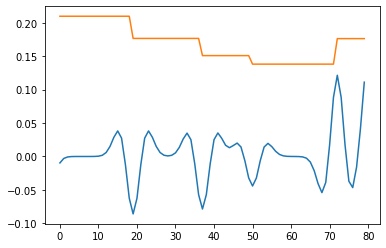

In [28]:
plt.plot(lr_crop[0,:])
plt.plot(hr_crop[0,:]/6e7)

In [ ]:
from prepare_data_seismic import *


hrs = []
lqs = []
dir_path_hr = '/sep/minjun/srflow/datasets/mj_data/hr'
dir_path_lr = '/sep/minjun/srflow/datasets/mj_data/lr'


for i in range(200):
    hr = np.load('/sep/minjun/srflow/datasets/mj_data/hr/hr%d.npy'%i)
    lr = np.load('/sep/minjun/srflow/datasets/mj_data/lr/lr%d.npy'%i) 
    for j in range(20):
        hr_crop, lr_crop = random_crop_same(hr,lr, 80)
        lr_crop = imresize(lr_crop, scalar_scale=0.25)      
        hrs.append(hr_crop)
        lqs.append(lr_crop)

shuffle_combined(hrs, lqs)

hrs_path = get_hrs_path(dir_path_hr)
to_pklv4(hrs, hrs_path, vebose=True)
to_pklv4_1pct(hrs, hrs_path, vebose=True)

lqs_path = get_lqs_path(dir_path_lr)
to_pklv4(lqs, lqs_path, vebose=True)
to_pklv4_1pct(lqs, lqs_path, vebose=True)

In [10]:
from prepare_data_seismic import *


hrs = []
lqs = []
dir_path_hr = '/sep/minjun/srflow/datasets/mj_data/hr'
dir_path_lr = '/sep/minjun/srflow/datasets/mj_data/lr'


for i in range(200):
    hr = np.load('/sep/minjun/srflow/datasets/mj_data/hr/hr%d.npy'%i)
    lr = np.load('/sep/minjun/srflow/datasets/mj_data/lr/lr%d.npy'%i) 
    for j in range(20):
        hr_crop, lr_crop = random_crop(hr,lr, 80)
        hrs.append(hr_crop)
        lqs.append(lr_crop)

shuffle_combined(hrs, lqs)

hrs_path = get_hrs_path(dir_path_hr)
to_pklv4(hrs, hrs_path, vebose=True)
to_pklv4_1pct(hrs, hrs_path, vebose=True)

lqs_path = get_lqs_path(dir_path_lr)
to_pklv4(lqs, lqs_path, vebose=True)
to_pklv4_1pct(lqs, lqs_path, vebose=True)

Wrote /sep/minjun/srflow/datasets/mj_data/pkls/hr.pklv4
Wrote /sep/minjun/srflow/datasets/mj_data/pkls/hr_1pct.pklv4
Wrote /sep/minjun/srflow/datasets/mj_data/pkls/lr_X4.pklv4
Wrote /sep/minjun/srflow/datasets/mj_data/pkls/lr_X4_1pct.pklv4


In [ ]:
def getEnv(name): import os; return True if name in os.environ.keys() else False

def init_dist(backend='nccl', **kwargs):
    ''' initialization for distributed training'''
    # if mp.get_start_method(allow_none=True) is None:
    if mp.get_start_method(allow_none=True) != 'spawn':
        mp.set_start_method('spawn')
    rank = int(os.environ['RANK'])
    num_gpus = torch.cuda.device_count()
    torch.cuda.set_deviceDistIterSampler(rank % num_gpus)
    dist.init_process_group(backend=backend, **kwargs)


## argparse in Jupyter notebook 
## read YAML file 
args = argparse.Namespace(
  opt='./confs/SRFlow_DF2K_4X.yml',
  launcher='none',
  local_rank=0
)
opt = option.parse(args.opt, is_train=True)

In [44]:
from torch.utils.data import TensorDataset


l = 1000
x = 500
ratio =4 
n = 20

HR = np.zeros(shape=[n,1,x,l])
LR = np.zeros(shape=[n,1,x,int(l/ratio)])

for i in range(n):
    HR[i,0,:,:],_,LR[i,0,:,:] = gen2d(l,x,ratio)
    
HR = HR/np.max(HR)

HR_torch = torch.Tensor(HR)
LR_torch = torch.Tensor(LR)

train_set = TensorDataset(LR_torch, HR_torch)


In [57]:
 opt["dataroot_GT"]

'/sep/minjun/srflow/datasets/div2k-validation-modcrop8-gt'

In [51]:
#### distributed training settings
opt['dist'] = False
rank = -1
print('Disabled distributed training.')

#### loading resume state if exists
if opt['path'].get('resume_state', None):
    resume_state_path, _ = get_resume_paths(opt)

    # distributed resuming: all load into default GPU
    if resume_state_path is None:
        resume_state = None
    else:
        device_id = torch.cuda.current_device()
        resume_state = torch.load(resume_state_path,
                                  map_location=lambda storage, loc: storage.cuda(device_id))
        option.check_resume(opt, resume_state['iter'])  # check resume options
else:
    resume_state = None

#### mkdir and loggers
if rank <= 0:  # normal training (rank -1) OR distributed training (rank 0)
    if resume_state is None:
        util.mkdir_and_rename(
            opt['path']['experiments_root'])  # rename experiment folder if exists
        util.mkdirs((path for key, path in opt['path'].items() if not key == 'experiments_root'
                     and 'pretrain_model' not in key and 'resume' not in key))

    # config loggers. Before it, the log will not work
    util.setup_logger('base', opt['path']['log'], 'train_' + opt['name'], level=logging.INFO,
                      screen=True, tofile=True)
    util.setup_logger('val', opt['path']['log'], 'val_' + opt['name'], level=logging.INFO,
                      screen=True, tofile=True)
    logger = logging.getLogger('base')
    logger.info(option.dict2str(opt))

    # tensorboard logger
    if opt.get('use_tb_logger', False) and 'debug' not in opt['name']:
        version = float(torch.__version__[0:3])
        if version >= 1.1:  # PyTorch 1.1
            from torch.utils.tensorboard import SummaryWriter
        else:
            logger.info(
                'You are using PyTorch {}. Tensorboard will use [tensorboardX]'.format(version))
            from tensorboardX import SummaryWriter
        conf_name = basename(args.opt).replace(".yml", "")
        exp_dir = opt['path']['experiments_root']
        log_dir_train = os.path.join(exp_dir, 'tb', conf_name, 'train')
        log_dir_valid = os.path.join(exp_dir, 'tb', conf_name, 'valid')
        tb_logger_train = SummaryWriter(log_dir=log_dir_train)
        tb_logger_valid = SummaryWriter(log_dir=log_dir_valid)
else:
    util.setup_logger('base', opt['path']['log'], 'train', level=logging.INFO, screen=True)
    logger = logging.getLogger('base')

# convert to NoneDict, which returns None for missing keys
opt = option.dict_to_nonedict(opt)

#### random seed
seed = opt['train']['manual_seed']
if seed is None:
    seed = random.randint(1, 10000)
if rank <= 0:
    logger.info('Random seed: {}'.format(seed))
util.set_random_seed(seed)

torch.backends.cudnn.benchmark = True
# torch.backends.cudnn.deterministic = True

# #### create train and val dataloader
# dataset_ratio = 200  # enlarge the size of each epoch
# for phase, dataset_opt in opt['datasets'].items():
#     if phase == 'train':
#         #train_set = create_dataset(dataset_opt)
#         train_set = {'LQ': LR_torch, 'GT': HR_torch}
#         print('Dataset created')
#         train_size = int(math.ceil(len(train_set) / dataset_opt['batch_size']))
#         total_iters = int(opt['train']['niter'])
#         total_epochs = int(math.ceil(total_iters / train_size))
#         train_sampler = None
#         train_loader = create_dataloader(train_set, dataset_opt, opt, train_sampler)
#         if rank <= 0:
#             logger.info('Number of train images: {:,d}, iters: {:,d}'.format(
#                 len(train_set), train_size))
#             logger.info('Total epochs needed: {:d} for iters {:,d}'.format(
#                 total_epochs, total_iters))
#     elif phase == 'val':
#         val_set = create_dataset(dataset_opt)
#         val_loader = create_dataloader(val_set, dataset_opt, opt, None)
#         if rank <= 0:
#             logger.info('Number of val images in [{:s}]: {:d}'.format(
#                 dataset_opt['name'], len(val_set)))
#     else:
#         raise NotImplementedError('Phase [{:s}] is not recognized.'.format(phase))
# assert train_loader is not None


Disabled distributed training.


pretrain_model path will be ignored when resuming training.
21-07-06 12:20:34.022 - INFO:   name: train
  use_tb_logger: True
  model: SRFlow
  distortion: sr
  scale: 4
  gpu_ids: [0]
  datasets:[
    train:[
      name: CelebA_160_tr
      mode: LRHR_PKL
      dataroot_GT: /sep/minjun/srflow/datasets/DF2K-tr.pklv4
      dataroot_LQ: /sep/minjun/srflow/datasets/DF2K-tr_X4.pklv4
      quant: 32
      use_shuffle: True
      n_workers: 3
      batch_size: 12
      GT_size: 160
      use_flip: True
      color: RGB
      phase: train
      scale: 4
      data_type: img
    ]
    val:[
      name: CelebA_160_va
      mode: LRHR_PKL
      dataroot_GT: /sep/minjun/srflow/datasets/DIV2K-va.pklv4
      dataroot_LQ: /sep/minjun/srflow/datasets/DIV2K-va_X4.pklv4
      quant: 32
      n_max: 20
      phase: val
      scale: 4
      data_type: img
    ]
  ]
  dataroot_GT: /sep/minjun/srflow/datasets/div2k-validation-modcrop8-gt
  dataroot_LR: /sep/minjun/srflow/datasets/div2k-validation-modcrop8-

In [52]:
#### create model
current_step = 0 if resume_state is None else resume_state['iter']
model = create_model(opt, current_step)

<class 'models.SRFlow_model.SRFlowModel'>


21-07-06 12:20:43.685 - INFO: Network G structure: DataParallel - SRFlowNet, with parameters: 39,541,811
21-07-06 12:20:43.687 - INFO: SRFlowNet(
  (RRDB): RRDBNet(
    (conv_first): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (RRDB_trunk): Sequential(
      (0): RRDB(
        (RDB1): ResidualDenseBlock_5C(
          (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv5): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
        )
        (RDB2): ResidualDenseBlock_5C(
          (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): Conv2d(96, 32, kernel_

21-07-06 12:20:44.426 - WARNING: Params [module.RRDB.conv_first.weight] will not optimize.
21-07-06 12:20:44.427 - WARNING: Params [module.RRDB.conv_first.bias] will not optimize.
21-07-06 12:20:44.428 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv1.weight] will not optimize.
21-07-06 12:20:44.428 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv1.bias] will not optimize.
21-07-06 12:20:44.429 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv2.weight] will not optimize.
21-07-06 12:20:44.429 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv2.bias] will not optimize.
21-07-06 12:20:44.430 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv3.weight] will not optimize.
21-07-06 12:20:44.430 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv3.bias] will not optimize.
21-07-06 12:20:44.431 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv4.weight] will not optimize.
21-07-06 12:20:44.431 - WARNING: Params [module.RRDB.RRDB_trunk.0.RDB1.conv4.bias] will not optimi

21-07-06 12:20:44.468 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB2.conv5.weight] will not optimize.
21-07-06 12:20:44.468 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB2.conv5.bias] will not optimize.
21-07-06 12:20:44.469 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv1.weight] will not optimize.
21-07-06 12:20:44.469 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv1.bias] will not optimize.
21-07-06 12:20:44.470 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv2.weight] will not optimize.
21-07-06 12:20:44.470 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv2.bias] will not optimize.
21-07-06 12:20:44.471 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv3.weight] will not optimize.
21-07-06 12:20:44.471 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv3.bias] will not optimize.
21-07-06 12:20:44.472 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.conv4.weight] will not optimize.
21-07-06 12:20:44.472 - WARNING: Params [module.RRDB.RRDB_trunk.2.RDB3.c

21-07-06 12:20:44.541 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB1.conv5.weight] will not optimize.
21-07-06 12:20:44.542 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB1.conv5.bias] will not optimize.
21-07-06 12:20:44.542 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv1.weight] will not optimize.
21-07-06 12:20:44.543 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv1.bias] will not optimize.
21-07-06 12:20:44.543 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv2.weight] will not optimize.
21-07-06 12:20:44.544 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv2.bias] will not optimize.
21-07-06 12:20:44.544 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv3.weight] will not optimize.
21-07-06 12:20:44.545 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv3.bias] will not optimize.
21-07-06 12:20:44.545 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.conv4.weight] will not optimize.
21-07-06 12:20:44.546 - WARNING: Params [module.RRDB.RRDB_trunk.5.RDB2.c

21-07-06 12:20:44.620 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB3.conv5.weight] will not optimize.
21-07-06 12:20:44.620 - WARNING: Params [module.RRDB.RRDB_trunk.7.RDB3.conv5.bias] will not optimize.
21-07-06 12:20:44.621 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv1.weight] will not optimize.
21-07-06 12:20:44.621 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv1.bias] will not optimize.
21-07-06 12:20:44.622 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv2.weight] will not optimize.
21-07-06 12:20:44.622 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv2.bias] will not optimize.
21-07-06 12:20:44.623 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv3.weight] will not optimize.
21-07-06 12:20:44.623 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv3.bias] will not optimize.
21-07-06 12:20:44.624 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.conv4.weight] will not optimize.
21-07-06 12:20:44.624 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB1.c

module.RRDB.conv_first.weight True
opt module.RRDB.conv_first.weight
module.RRDB.conv_first.bias True
opt module.RRDB.conv_first.bias
module.RRDB.RRDB_trunk.0.RDB1.conv1.weight True
opt module.RRDB.RRDB_trunk.0.RDB1.conv1.weight
module.RRDB.RRDB_trunk.0.RDB1.conv1.bias True
opt module.RRDB.RRDB_trunk.0.RDB1.conv1.bias
module.RRDB.RRDB_trunk.0.RDB1.conv2.weight True
opt module.RRDB.RRDB_trunk.0.RDB1.conv2.weight
module.RRDB.RRDB_trunk.0.RDB1.conv2.bias True
opt module.RRDB.RRDB_trunk.0.RDB1.conv2.bias
module.RRDB.RRDB_trunk.0.RDB1.conv3.weight True
opt module.RRDB.RRDB_trunk.0.RDB1.conv3.weight
module.RRDB.RRDB_trunk.0.RDB1.conv3.bias True
opt module.RRDB.RRDB_trunk.0.RDB1.conv3.bias
module.RRDB.RRDB_trunk.0.RDB1.conv4.weight True
opt module.RRDB.RRDB_trunk.0.RDB1.conv4.weight
module.RRDB.RRDB_trunk.0.RDB1.conv4.bias True
opt module.RRDB.RRDB_trunk.0.RDB1.conv4.bias
module.RRDB.RRDB_trunk.0.RDB1.conv5.weight True
opt module.RRDB.RRDB_trunk.0.RDB1.conv5.weight
module.RRDB.RRDB_trunk.0.RD

21-07-06 12:20:44.627 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv2.weight] will not optimize.
21-07-06 12:20:44.627 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv2.bias] will not optimize.
21-07-06 12:20:44.628 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv3.weight] will not optimize.
21-07-06 12:20:44.628 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv3.bias] will not optimize.
21-07-06 12:20:44.629 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv4.weight] will not optimize.
21-07-06 12:20:44.630 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv4.bias] will not optimize.
21-07-06 12:20:44.630 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv5.weight] will not optimize.
21-07-06 12:20:44.631 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB2.conv5.bias] will not optimize.
21-07-06 12:20:44.631 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB3.conv1.weight] will not optimize.
21-07-06 12:20:44.632 - WARNING: Params [module.RRDB.RRDB_trunk.8.RDB3.c

21-07-06 12:20:44.668 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv2.weight] will not optimize.
21-07-06 12:20:44.669 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv2.bias] will not optimize.
21-07-06 12:20:44.670 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv3.weight] will not optimize.
21-07-06 12:20:44.670 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv3.bias] will not optimize.
21-07-06 12:20:44.671 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv4.weight] will not optimize.
21-07-06 12:20:44.671 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv4.bias] will not optimize.
21-07-06 12:20:44.672 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv5.weight] will not optimize.
21-07-06 12:20:44.672 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB1.conv5.bias] will not optimize.
21-07-06 12:20:44.673 - WARNING: Params [module.RRDB.RRDB_trunk.11.RDB2.conv1.weight] will not optimize.
21-07-06 12:20:44.673 - WARNING: Params [module.RRDB.RRDB_trunk

21-07-06 12:20:44.765 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv1.bias] will not optimize.
21-07-06 12:20:44.765 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv2.weight] will not optimize.
21-07-06 12:20:44.766 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv2.bias] will not optimize.
21-07-06 12:20:44.766 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv3.weight] will not optimize.
21-07-06 12:20:44.767 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv3.bias] will not optimize.
21-07-06 12:20:44.767 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv4.weight] will not optimize.
21-07-06 12:20:44.768 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv4.bias] will not optimize.
21-07-06 12:20:44.768 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv5.weight] will not optimize.
21-07-06 12:20:44.769 - WARNING: Params [module.RRDB.RRDB_trunk.13.RDB3.conv5.bias] will not optimize.
21-07-06 12:20:44.769 - WARNING: Params [module.RRDB.RRDB_trunk.1

21-07-06 12:20:44.805 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv1.weight] will not optimize.
21-07-06 12:20:44.805 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv1.bias] will not optimize.
21-07-06 12:20:44.806 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv2.weight] will not optimize.
21-07-06 12:20:44.806 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv2.bias] will not optimize.
21-07-06 12:20:44.807 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv3.weight] will not optimize.
21-07-06 12:20:44.808 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv3.bias] will not optimize.
21-07-06 12:20:44.808 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv4.weight] will not optimize.
21-07-06 12:20:44.809 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv4.bias] will not optimize.
21-07-06 12:20:44.809 - WARNING: Params [module.RRDB.RRDB_trunk.16.RDB2.conv5.weight] will not optimize.
21-07-06 12:20:44.810 - WARNING: Params [module.RRDB.RRDB_trunk

module.RRDB.RRDB_trunk.8.RDB2.conv2.weight True
opt module.RRDB.RRDB_trunk.8.RDB2.conv2.weight
module.RRDB.RRDB_trunk.8.RDB2.conv2.bias True
opt module.RRDB.RRDB_trunk.8.RDB2.conv2.bias
module.RRDB.RRDB_trunk.8.RDB2.conv3.weight True
opt module.RRDB.RRDB_trunk.8.RDB2.conv3.weight
module.RRDB.RRDB_trunk.8.RDB2.conv3.bias True
opt module.RRDB.RRDB_trunk.8.RDB2.conv3.bias
module.RRDB.RRDB_trunk.8.RDB2.conv4.weight True
opt module.RRDB.RRDB_trunk.8.RDB2.conv4.weight
module.RRDB.RRDB_trunk.8.RDB2.conv4.bias True
opt module.RRDB.RRDB_trunk.8.RDB2.conv4.bias
module.RRDB.RRDB_trunk.8.RDB2.conv5.weight True
opt module.RRDB.RRDB_trunk.8.RDB2.conv5.weight
module.RRDB.RRDB_trunk.8.RDB2.conv5.bias True
opt module.RRDB.RRDB_trunk.8.RDB2.conv5.bias
module.RRDB.RRDB_trunk.8.RDB3.conv1.weight True
opt module.RRDB.RRDB_trunk.8.RDB3.conv1.weight
module.RRDB.RRDB_trunk.8.RDB3.conv1.bias True
opt module.RRDB.RRDB_trunk.8.RDB3.conv1.bias
module.RRDB.RRDB_trunk.8.RDB3.conv2.weight True
opt module.RRDB.RRDB_t

21-07-06 12:20:44.851 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv1.weight] will not optimize.
21-07-06 12:20:44.861 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv1.bias] will not optimize.
21-07-06 12:20:44.862 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv2.weight] will not optimize.
21-07-06 12:20:44.862 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv2.bias] will not optimize.
21-07-06 12:20:44.863 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv3.weight] will not optimize.
21-07-06 12:20:44.863 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv3.bias] will not optimize.
21-07-06 12:20:44.864 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv4.weight] will not optimize.
21-07-06 12:20:44.864 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv4.bias] will not optimize.
21-07-06 12:20:44.865 - WARNING: Params [module.RRDB.RRDB_trunk.17.RDB3.conv5.weight] will not optimize.
21-07-06 12:20:44.865 - WARNING: Params [module.RRDB.RRDB_trunk

21-07-06 12:20:44.908 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB1.conv5.bias] will not optimize.
21-07-06 12:20:44.909 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv1.weight] will not optimize.
21-07-06 12:20:44.909 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv1.bias] will not optimize.
21-07-06 12:20:44.910 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv2.weight] will not optimize.
21-07-06 12:20:44.910 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv2.bias] will not optimize.
21-07-06 12:20:44.911 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv3.weight] will not optimize.
21-07-06 12:20:44.911 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv3.bias] will not optimize.
21-07-06 12:20:44.912 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv4.weight] will not optimize.
21-07-06 12:20:44.912 - WARNING: Params [module.RRDB.RRDB_trunk.20.RDB2.conv4.bias] will not optimize.
21-07-06 12:20:44.913 - WARNING: Params [module.RRDB.RRDB_trunk.2

21-07-06 12:20:44.947 - WARNING: Params [module.RRDB.RRDB_trunk.22.RDB3.conv5.weight] will not optimize.
21-07-06 12:20:44.948 - WARNING: Params [module.RRDB.RRDB_trunk.22.RDB3.conv5.bias] will not optimize.
21-07-06 12:20:44.948 - WARNING: Params [module.RRDB.trunk_conv.weight] will not optimize.
21-07-06 12:20:44.949 - WARNING: Params [module.RRDB.trunk_conv.bias] will not optimize.
21-07-06 12:20:44.949 - WARNING: Params [module.RRDB.upconv1.weight] will not optimize.
21-07-06 12:20:44.950 - WARNING: Params [module.RRDB.upconv1.bias] will not optimize.
21-07-06 12:20:44.950 - WARNING: Params [module.RRDB.upconv2.weight] will not optimize.
21-07-06 12:20:44.951 - WARNING: Params [module.RRDB.upconv2.bias] will not optimize.
21-07-06 12:20:44.951 - WARNING: Params [module.RRDB.HRconv.weight] will not optimize.
21-07-06 12:20:44.994 - WARNING: Params [module.RRDB.HRconv.bias] will not optimize.
21-07-06 12:20:44.994 - WARNING: Params [module.RRDB.conv_last.weight] will not optimize.
21

21-07-06 12:20:45.024 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.025 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.025 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.2.weight] will not optimize.
21-07-06 12:20:45.026 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.026 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.026 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.4.weight] will not optimize.
21-07-06 12:20:45.027 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.4.bias] will not optimize.
21-07-06 12:20:45.027 - WARNING: Params [module.flowUpsamplerNet.layers.5.affine.fFeatures.4.logs] will not optimize.
21-07-06 12:20:45.02

opt module.RRDB.RRDB_trunk.17.RDB3.conv1.weight
module.RRDB.RRDB_trunk.17.RDB3.conv1.bias True
opt module.RRDB.RRDB_trunk.17.RDB3.conv1.bias
module.RRDB.RRDB_trunk.17.RDB3.conv2.weight True
opt module.RRDB.RRDB_trunk.17.RDB3.conv2.weight
module.RRDB.RRDB_trunk.17.RDB3.conv2.bias True
opt module.RRDB.RRDB_trunk.17.RDB3.conv2.bias
module.RRDB.RRDB_trunk.17.RDB3.conv3.weight True
opt module.RRDB.RRDB_trunk.17.RDB3.conv3.weight
module.RRDB.RRDB_trunk.17.RDB3.conv3.bias True
opt module.RRDB.RRDB_trunk.17.RDB3.conv3.bias
module.RRDB.RRDB_trunk.17.RDB3.conv4.weight True
opt module.RRDB.RRDB_trunk.17.RDB3.conv4.weight
module.RRDB.RRDB_trunk.17.RDB3.conv4.bias True
opt module.RRDB.RRDB_trunk.17.RDB3.conv4.bias
module.RRDB.RRDB_trunk.17.RDB3.conv5.weight True
opt module.RRDB.RRDB_trunk.17.RDB3.conv5.weight
module.RRDB.RRDB_trunk.17.RDB3.conv5.bias True
opt module.RRDB.RRDB_trunk.17.RDB3.conv5.bias
module.RRDB.RRDB_trunk.18.RDB1.conv1.weight True
opt module.RRDB.RRDB_trunk.18.RDB1.conv1.weight
mo

21-07-06 12:20:45.052 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.052 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.053 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.053 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.054 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.054 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fFeatures.2.weight] will not optimize.
21-07-06 12:20:45.055 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fFeatures.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.055 - WARNING: Params [module.flowUpsamplerNet.layers.8.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.056 - 

21-07-06 12:20:45.107 - WARNING: Params [module.flowUpsamplerNet.layers.11.affine.fFeatures.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.119 - WARNING: Params [module.flowUpsamplerNet.layers.11.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.120 - WARNING: Params [module.flowUpsamplerNet.layers.11.affine.fFeatures.4.weight] will not optimize.
21-07-06 12:20:45.120 - WARNING: Params [module.flowUpsamplerNet.layers.11.affine.fFeatures.4.bias] will not optimize.
21-07-06 12:20:45.121 - WARNING: Params [module.flowUpsamplerNet.layers.11.affine.fFeatures.4.logs] will not optimize.
21-07-06 12:20:45.121 - WARNING: Params [module.flowUpsamplerNet.layers.12.actnorm.bias] will not optimize.
21-07-06 12:20:45.121 - WARNING: Params [module.flowUpsamplerNet.layers.12.actnorm.logs] will not optimize.
21-07-06 12:20:45.122 - WARNING: Params [module.flowUpsamplerNet.layers.12.invconv.weight] will not optimize.
21-07-06 12:20:45.122 - WARNING: Params [module.flowUpsampler

21-07-06 12:20:45.151 - WARNING: Params [module.flowUpsamplerNet.layers.15.actnorm.logs] will not optimize.
21-07-06 12:20:45.151 - WARNING: Params [module.flowUpsamplerNet.layers.15.invconv.weight] will not optimize.
21-07-06 12:20:45.152 - WARNING: Params [module.flowUpsamplerNet.layers.15.affine.fAffine.0.weight] will not optimize.
21-07-06 12:20:45.152 - WARNING: Params [module.flowUpsamplerNet.layers.15.affine.fAffine.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.153 - WARNING: Params [module.flowUpsamplerNet.layers.15.affine.fAffine.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.153 - WARNING: Params [module.flowUpsamplerNet.layers.15.affine.fAffine.2.weight] will not optimize.
21-07-06 12:20:45.154 - WARNING: Params [module.flowUpsamplerNet.layers.15.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.154 - WARNING: Params [module.flowUpsamplerNet.layers.15.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.155 - WARNING: Params [mod

21-07-06 12:20:45.199 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.199 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.200 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.200 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.201 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.201 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.202 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.202 - WARNING: Params [module.flowUpsamplerNet.layers.18.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.203 

21-07-06 12:20:45.232 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.233 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.2.weight] will not optimize.
21-07-06 12:20:45.233 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.234 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.234 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.235 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.235 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.236 - WARNING: Params [module.flowUpsamplerNet.layers.25.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.236 - WARNING:

module.flowUpsamplerNet.layers.8.affine.fAffine.4.bias True
module.flowUpsamplerNet.layers.8.affine.fAffine.4.logs True
module.flowUpsamplerNet.layers.8.affine.fFeatures.0.weight True
module.flowUpsamplerNet.layers.8.affine.fFeatures.0.actnorm.bias True
module.flowUpsamplerNet.layers.8.affine.fFeatures.0.actnorm.logs True
module.flowUpsamplerNet.layers.8.affine.fFeatures.2.weight True
module.flowUpsamplerNet.layers.8.affine.fFeatures.2.actnorm.bias True
module.flowUpsamplerNet.layers.8.affine.fFeatures.2.actnorm.logs True
module.flowUpsamplerNet.layers.8.affine.fFeatures.4.weight True
module.flowUpsamplerNet.layers.8.affine.fFeatures.4.bias True
module.flowUpsamplerNet.layers.8.affine.fFeatures.4.logs True
module.flowUpsamplerNet.layers.9.actnorm.bias True
module.flowUpsamplerNet.layers.9.actnorm.logs True
module.flowUpsamplerNet.layers.9.invconv.weight True
module.flowUpsamplerNet.layers.9.affine.fAffine.0.weight True
module.flowUpsamplerNet.layers.9.affine.fAffine.0.actnorm.bias True

21-07-06 12:20:45.253 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fAffine.2.weight] will not optimize.
21-07-06 12:20:45.253 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.254 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.254 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.255 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.255 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.256 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.256 - WARNING: Params [module.flowUpsamplerNet.layers.27.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.257 - WARNIN

21-07-06 12:20:45.328 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.328 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.329 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.329 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.2.weight] will not optimize.
21-07-06 12:20:45.330 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.330 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.331 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.4.weight] will not optimize.
21-07-06 12:20:45.331 - WARNING: Params [module.flowUpsamplerNet.layers.30.affine.fFeatures.4.bias] will not optimize.
21-07-06 1

21-07-06 12:20:45.366 - WARNING: Params [module.flowUpsamplerNet.layers.33.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.367 - WARNING: Params [module.flowUpsamplerNet.layers.33.affine.fFeatures.4.weight] will not optimize.
21-07-06 12:20:45.367 - WARNING: Params [module.flowUpsamplerNet.layers.33.affine.fFeatures.4.bias] will not optimize.
21-07-06 12:20:45.367 - WARNING: Params [module.flowUpsamplerNet.layers.33.affine.fFeatures.4.logs] will not optimize.
21-07-06 12:20:45.368 - WARNING: Params [module.flowUpsamplerNet.layers.34.actnorm.bias] will not optimize.
21-07-06 12:20:45.368 - WARNING: Params [module.flowUpsamplerNet.layers.34.actnorm.logs] will not optimize.
21-07-06 12:20:45.369 - WARNING: Params [module.flowUpsamplerNet.layers.34.invconv.weight] will not optimize.
21-07-06 12:20:45.369 - WARNING: Params [module.flowUpsamplerNet.layers.34.affine.fAffine.0.weight] will not optimize.
21-07-06 12:20:45.370 - WARNING: Params [module.flowUpsamplerNet.laye

21-07-06 12:20:45.419 - WARNING: Params [module.flowUpsamplerNet.layers.37.invconv.weight] will not optimize.
21-07-06 12:20:45.419 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.0.weight] will not optimize.
21-07-06 12:20:45.420 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.420 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.421 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.2.weight] will not optimize.
21-07-06 12:20:45.421 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.422 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.422 - WARNING: Params [module.flowUpsamplerNet.layers.37.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.423 - WARNING: 

module.flowUpsamplerNet.layers.27.affine.fAffine.2.weight True
module.flowUpsamplerNet.layers.27.affine.fAffine.2.actnorm.bias True
module.flowUpsamplerNet.layers.27.affine.fAffine.2.actnorm.logs True
module.flowUpsamplerNet.layers.27.affine.fAffine.4.weight True
module.flowUpsamplerNet.layers.27.affine.fAffine.4.bias True
module.flowUpsamplerNet.layers.27.affine.fAffine.4.logs True
module.flowUpsamplerNet.layers.27.affine.fFeatures.0.weight True
module.flowUpsamplerNet.layers.27.affine.fFeatures.0.actnorm.bias True
module.flowUpsamplerNet.layers.27.affine.fFeatures.0.actnorm.logs True
module.flowUpsamplerNet.layers.27.affine.fFeatures.2.weight True
module.flowUpsamplerNet.layers.27.affine.fFeatures.2.actnorm.bias True
module.flowUpsamplerNet.layers.27.affine.fFeatures.2.actnorm.logs True
module.flowUpsamplerNet.layers.27.affine.fFeatures.4.weight True
module.flowUpsamplerNet.layers.27.affine.fFeatures.4.bias True
module.flowUpsamplerNet.layers.27.affine.fFeatures.4.logs True
module.fl

21-07-06 12:20:45.443 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fAffine.2.weight] will not optimize.
21-07-06 12:20:45.454 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.454 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.455 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.455 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.455 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.456 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.456 - WARNING: Params [module.flowUpsamplerNet.layers.42.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.457 - WARNIN

21-07-06 12:20:45.499 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.499 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.500 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.500 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.2.weight] will not optimize.
21-07-06 12:20:45.501 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.501 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.502 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.4.weight] will not optimize.
21-07-06 12:20:45.502 - WARNING: Params [module.flowUpsamplerNet.layers.45.affine.fFeatures.4.bias] will not optimize.
21-07-06 1

21-07-06 12:20:45.542 - WARNING: Params [module.flowUpsamplerNet.layers.48.affine.fFeatures.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.543 - WARNING: Params [module.flowUpsamplerNet.layers.48.affine.fFeatures.4.weight] will not optimize.
21-07-06 12:20:45.543 - WARNING: Params [module.flowUpsamplerNet.layers.48.affine.fFeatures.4.bias] will not optimize.
21-07-06 12:20:45.544 - WARNING: Params [module.flowUpsamplerNet.layers.48.affine.fFeatures.4.logs] will not optimize.
21-07-06 12:20:45.544 - WARNING: Params [module.flowUpsamplerNet.layers.49.actnorm.bias] will not optimize.
21-07-06 12:20:45.545 - WARNING: Params [module.flowUpsamplerNet.layers.49.actnorm.logs] will not optimize.
21-07-06 12:20:45.545 - WARNING: Params [module.flowUpsamplerNet.layers.49.invconv.weight] will not optimize.
21-07-06 12:20:45.546 - WARNING: Params [module.flowUpsamplerNet.layers.49.affine.fAffine.0.weight] will not optimize.
21-07-06 12:20:45.546 - WARNING: Params [module.flowUpsamplerNet.laye

21-07-06 12:20:45.591 - WARNING: Params [module.flowUpsamplerNet.layers.52.invconv.weight] will not optimize.
21-07-06 12:20:45.591 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.0.weight] will not optimize.
21-07-06 12:20:45.592 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.592 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.593 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.2.weight] will not optimize.
21-07-06 12:20:45.593 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.593 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.594 - WARNING: Params [module.flowUpsamplerNet.layers.52.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.594 - WARNING: 

21-07-06 12:20:45.644 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fAffine.2.actnorm.logs] will not optimize.
21-07-06 12:20:45.644 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.645 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.645 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.646 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.646 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.646 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.647 - WARNING: Params [module.flowUpsamplerNet.layers.55.affine.fFeatures.2.weight] will not optimize.
21-07-06 12:20:45.647 - WA

module.flowUpsamplerNet.layers.42.affine.fAffine.2.actnorm.bias True
module.flowUpsamplerNet.layers.42.affine.fAffine.2.actnorm.logs True
module.flowUpsamplerNet.layers.42.affine.fAffine.4.weight True
module.flowUpsamplerNet.layers.42.affine.fAffine.4.bias True
module.flowUpsamplerNet.layers.42.affine.fAffine.4.logs True
module.flowUpsamplerNet.layers.42.affine.fFeatures.0.weight True
module.flowUpsamplerNet.layers.42.affine.fFeatures.0.actnorm.bias True
module.flowUpsamplerNet.layers.42.affine.fFeatures.0.actnorm.logs True
module.flowUpsamplerNet.layers.42.affine.fFeatures.2.weight True
module.flowUpsamplerNet.layers.42.affine.fFeatures.2.actnorm.bias True
module.flowUpsamplerNet.layers.42.affine.fFeatures.2.actnorm.logs True
module.flowUpsamplerNet.layers.42.affine.fFeatures.4.weight True
module.flowUpsamplerNet.layers.42.affine.fFeatures.4.bias True
module.flowUpsamplerNet.layers.42.affine.fFeatures.4.logs True
module.flowUpsamplerNet.layers.43.actnorm.bias True
module.flowUpsampler

21-07-06 12:20:45.654 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fAffine.4.weight] will not optimize.
21-07-06 12:20:45.655 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fAffine.4.bias] will not optimize.
21-07-06 12:20:45.655 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fAffine.4.logs] will not optimize.
21-07-06 12:20:45.656 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fFeatures.0.weight] will not optimize.
21-07-06 12:20:45.656 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fFeatures.0.actnorm.bias] will not optimize.
21-07-06 12:20:45.657 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fFeatures.0.actnorm.logs] will not optimize.
21-07-06 12:20:45.657 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fFeatures.2.weight] will not optimize.
21-07-06 12:20:45.658 - WARNING: Params [module.flowUpsamplerNet.layers.56.affine.fFeatures.2.actnorm.bias] will not optimize.
21-07-06 12:20:45.658 - 

module.flowUpsamplerNet.layers.56.affine.fAffine.4.weight True
module.flowUpsamplerNet.layers.56.affine.fAffine.4.bias True
module.flowUpsamplerNet.layers.56.affine.fAffine.4.logs True
module.flowUpsamplerNet.layers.56.affine.fFeatures.0.weight True
module.flowUpsamplerNet.layers.56.affine.fFeatures.0.actnorm.bias True
module.flowUpsamplerNet.layers.56.affine.fFeatures.0.actnorm.logs True
module.flowUpsamplerNet.layers.56.affine.fFeatures.2.weight True
module.flowUpsamplerNet.layers.56.affine.fFeatures.2.actnorm.bias True
module.flowUpsamplerNet.layers.56.affine.fFeatures.2.actnorm.logs True
module.flowUpsamplerNet.layers.56.affine.fFeatures.4.weight True
module.flowUpsamplerNet.layers.56.affine.fFeatures.4.bias True
module.flowUpsamplerNet.layers.56.affine.fFeatures.4.logs True
module.flowUpsamplerNet.layers.57.actnorm.bias True
module.flowUpsamplerNet.layers.57.actnorm.logs True
module.flowUpsamplerNet.layers.57.invconv.weight True
module.flowUpsamplerNet.layers.57.affine.fAffine.0.w

In [53]:
#### resume training
if resume_state:
    logger.info('Resuming training from epoch: {}, iter: {}.'.format(
        resume_state['epoch'], resume_state['iter']))

    start_epoch = resume_state['epoch']
    current_step = resume_state['iter']
    model.resume_training(resume_state)  # handle optimizers and schedulers
else:
    current_step = 0
    start_epoch = 0

21-07-06 12:20:52.664 - INFO: Resuming training from epoch: 0, iter: 4000.


In [54]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True,
                                           num_workers=1, drop_last=True,
                                           pin_memory=False)


In [55]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
      for batch_idx, samples in enumerate(train_loader):
            model.feed_data(samples)


TypeError: list indices must be integers or slices, not str

In [18]:
print(train_data['LQ'].shape) 
print(train_data['GT'].shape) 
print(train_data['GT_path'])





torch.Size([12, 3, 40, 40])
torch.Size([12, 3, 160, 160])
['31846', '19609', '133610', '10980', '57090', '4778', '147185', '70311', '109228', '50474', '15622', '64618']


In [19]:
#### training
timer = Timer()
#logger.info('Start training from epoch: {:d}, iter: {:d}'.format(start_epoch, current_step))
timerData = TickTock()

for epoch in range(start_epoch, total_epochs + 1):
    if opt['dist']:
        train_sampler.set_epoch(epoch)

    timerData.tick()
    for _, train_data in enumerate(train_loader):
        timerData.tock()
        current_step += 1
        if current_step > total_iters:
            break

        #### training
        model.feed_data(train_data)

        #### update learning rate
        model.update_learning_rate(current_step, warmup_iter=opt['train']['warmup_iter'])

        try:
            nll = model.optimize_parameters(current_step)
        except RuntimeError as e:
            print("Skipping ERROR caught in nll = model.optimize_parameters(current_step): ")
            print(e)

        if nll is None:
            nll = 0

        #### log
        def eta(t_iter):
            return (t_iter * (opt['train']['niter'] - current_step)) / 3600

        if current_step % opt['logger']['print_freq'] == 0 \
                or current_step - (resume_state['iter'] if resume_state else 0) < 25:
            avg_time = timer.get_average_and_reset()
            avg_data_time = timerData.get_average_and_reset()
            message = '<epoch:{:3d}, iter:{:8,d}, lr:{:.3e}, t:{:.2e}, td:{:.2e}, eta:{:.2e}, nll:{:.3e}> '.format(
                epoch, current_step, model.get_current_learning_rate(), avg_time, avg_data_time,
                eta(avg_time), nll)
            print(message)
        timer.tick()
        #Reduce number of logs
        if current_step % 5 == 0:
            tb_logger_train.add_scalar('loss/nll', nll, current_step)
            tb_logger_train.add_scalar('lr/base', model.get_current_learning_rate(), current_step)
            tb_logger_train.add_scalar('time/iteration', timer.get_last_iteration(), current_step)
            tb_logger_train.add_scalar('time/data', timerData.get_last_iteration(), current_step)
            tb_logger_train.add_scalar('time/eta', eta(timer.get_last_iteration()), current_step)
            for k, v in model.get_current_log().items():
                tb_logger_train.add_scalar(k, v, current_step)

        # validation
        if current_step % opt['train']['val_freq'] == 0 and rank <= 0:
            avg_psnr = 0.0
            idx = 0
            nlls = []
            for val_data in val_loader:
                idx += 1
                img_name = os.path.splitext(os.path.basename(val_data['LQ_path'][0]))[0]
                img_dir = os.path.join(opt['path']['val_images'], img_name)
                util.mkdir(img_dir)

                model.feed_data(val_data)

                nll = model.test()
                if nll is None:
                    nll = 0
                nlls.append(nll)

                visuals = model.get_current_visuals()

                sr_img = None
                # Save SR images for reference
                if hasattr(model, 'heats'):
                    for heat in model.heats:
                        for i in range(model.n_sample):
                            sr_img = util.tensor2img(visuals['SR', heat, i])  # uint8
                            save_img_path = os.path.join(img_dir,
                                                         '{:s}_{:09d}_h{:03d}_s{:d}.png'.format(img_name,
                                                                                                current_step,
                                                                                                int(heat * 100), i))
                            util.save_img(sr_img, save_img_path)
                else:
                    sr_img = util.tensor2img(visuals['SR'])  # uint8
                    save_img_path = os.path.join(img_dir,
                                                 '{:s}_{:d}.png'.format(img_name, current_step))
                    util.save_img(sr_img, save_img_path)
                assert sr_img is not None

                # Save LQ images for reference
                save_img_path_lq = os.path.join(img_dir,
                                                '{:s}_LQ.png'.format(img_name))
                if not os.path.isfile(save_img_path_lq):
                    lq_img = util.tensor2img(visuals['LQ'])  # uint8
                    util.save_img(
                        cv2.resize(lq_img, dsize=None, fx=opt['scale'], fy=opt['scale'],
                                   interpolation=cv2.INTER_NEAREST),
                        save_img_path_lq)

                # Save GT images for reference
                gt_img = util.tensor2img(visuals['GT'])  # uint8
                save_img_path_gt = os.path.join(img_dir,
                                                '{:s}_GT.png'.format(img_name))
                if not os.path.isfile(save_img_path_gt):
                    util.save_img(gt_img, save_img_path_gt)

                # calculate PSNR
                crop_size = opt['scale']
                gt_img = gt_img / 255.
                sr_img = sr_img / 255.
                cropped_sr_img = sr_img[crop_size:-crop_size, crop_size:-crop_size, :]
                cropped_gt_img = gt_img[crop_size:-crop_size, crop_size:-crop_size, :]
                avg_psnr += util.calculate_psnr(cropped_sr_img * 255, cropped_gt_img * 255)

            avg_psnr = avg_psnr / idx
            avg_nll = sum(nlls) / len(nlls)

            # log
            logger.info('# Validation # PSNR: {:.4e}'.format(avg_psnr))
            logger_val = logging.getLogger('val')  # validation logger
            logger_val.info('<epoch:{:3d}, iter:{:8,d}> psnr: {:.4e}'.format(
                epoch, current_step, avg_psnr))

            # tensorboard logger
            tb_logger_valid.add_scalar('loss/psnr', avg_psnr, current_step)
            tb_logger_valid.add_scalar('loss/nll', avg_nll, current_step)

            tb_logger_train.flush()
            tb_logger_valid.flush()

        #### save models and training states
        if current_step % opt['logger']['save_checkpoint_freq'] == 0:
            if rank <= 0:
                logger.info('Saving models and training states.')
                model.save(current_step)
                model.save_training_state(epoch, current_step)

        timerData.tick()

with open(os.path.join(opt['path']['root'], "TRAIN_DONE"), 'w') as f:
    f.write("TRAIN_DONE")

if rank <= 0:
    logger.info('Saving the final model.')
    model.save('latest')
    logger.info('End of training.')


/sep/minjun/anaconda3/envs/srflow/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
/sep/minjun/anaconda3/envs/srflow/lib/python3.7/site-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.

<epoch:  0, iter:       1, lr:2.500e-04, t:-1.00e+00, td:9.66e-01, eta:-5.56e+01, nll:-7.292e+00> 
<epoch:  0, iter:       2, lr:2.500e-04, t:-1.00e+00, td:1.09e-03, eta:-5.56e+01, nll:3.881e+01> 
<epoch:  0, iter:       3, lr:2.500e-04, t:4.95e+00, td:2.12e-03, eta:2.75e+02, nll:5.116e+01> 
<epoch:  0, iter:       4, lr:2.500e-04, t:2.59e+00, td:3.46e-03, eta:1.44e+02, nll:2.874e+00> 
<epoch:  0, iter:       5, lr:2.500e-04, t:2.91e+00, td:9.20e-04, eta:1.62e+02, nll:-1.009e+00> 
<epoch:  0, iter:       6, lr:2.500e-04, t:2.59e+00, td:1.24e-03, eta:1.44e+02, nll:-2.737e+00> 
<epoch:  0, iter:       7, lr:2.500e-04, t:2.57e+00, td:2.17e-03, eta:1.43e+02, nll:-3.300e+00> 
<epoch:  0, iter:       8, lr:2.500e-04, t:2.58e+00, td:2.18e-03, eta:1.43e+02, nll:-3.309e+00> 
<epoch:  0, iter:       9, lr:2.500e-04, t:2.87e+00, td:2.09e-03, eta:1.59e+02, nll:-3.700e+00> 
<epoch:  0, iter:      10, lr:2.500e-04, t:2.64e+00, td:2.26e-03, eta:1.47e+02, nll:-4.664e+00> 
<epoch:  0, iter:      11, lr

21-07-01 12:22:10.522 - INFO: Saving models and training states.
21-07-01 12:22:10.522 - INFO: Saving models and training states.
21-07-01 12:22:10.522 - INFO: Saving models and training states.


<epoch:  0, iter:   1,000, lr:2.500e-04, t:2.62e+00, td:1.93e-03, eta:1.45e+02, nll:-1.459e+01> 
<epoch:  0, iter:   1,100, lr:2.500e-04, t:2.70e+00, td:1.89e-03, eta:1.49e+02, nll:-1.523e+01> 
<epoch:  0, iter:   1,200, lr:2.500e-04, t:2.63e+00, td:1.90e-03, eta:1.45e+02, nll:-1.711e+01> 
<epoch:  0, iter:   1,300, lr:2.500e-04, t:2.62e+00, td:1.90e-03, eta:1.45e+02, nll:-1.600e+01> 
<epoch:  0, iter:   1,400, lr:2.500e-04, t:2.63e+00, td:1.93e-03, eta:1.45e+02, nll:-1.602e+01> 
<epoch:  0, iter:   1,500, lr:2.500e-04, t:2.64e+00, td:1.95e-03, eta:1.45e+02, nll:-1.575e+01> 
<epoch:  0, iter:   1,600, lr:2.500e-04, t:2.61e+00, td:1.89e-03, eta:1.44e+02, nll:-1.435e+01> 
<epoch:  0, iter:   1,700, lr:2.500e-04, t:2.60e+00, td:1.89e-03, eta:1.43e+02, nll:-1.316e+01> 
<epoch:  0, iter:   1,800, lr:2.500e-04, t:2.59e+00, td:1.91e-03, eta:1.43e+02, nll:-1.518e+01> 
<epoch:  0, iter:   1,900, lr:2.500e-04, t:2.59e+00, td:1.91e-03, eta:1.43e+02, nll:-1.455e+01> 


21-07-01 13:05:51.119 - INFO: Saving models and training states.
21-07-01 13:05:51.119 - INFO: Saving models and training states.
21-07-01 13:05:51.119 - INFO: Saving models and training states.


<epoch:  0, iter:   2,000, lr:2.500e-04, t:2.60e+00, td:1.90e-03, eta:1.43e+02, nll:-1.508e+01> 
<epoch:  0, iter:   2,100, lr:2.500e-04, t:2.68e+00, td:1.92e-03, eta:1.47e+02, nll:-1.499e+01> 
<epoch:  0, iter:   2,200, lr:2.500e-04, t:2.61e+00, td:1.88e-03, eta:1.44e+02, nll:-1.582e+01> 
<epoch:  0, iter:   2,300, lr:2.500e-04, t:2.60e+00, td:1.88e-03, eta:1.43e+02, nll:-1.522e+01> 
<epoch:  0, iter:   2,400, lr:2.500e-04, t:2.60e+00, td:1.94e-03, eta:1.43e+02, nll:-1.589e+01> 
<epoch:  0, iter:   2,500, lr:2.500e-04, t:2.61e+00, td:1.91e-03, eta:1.43e+02, nll:-1.626e+01> 
<epoch:  0, iter:   2,600, lr:2.500e-04, t:2.60e+00, td:1.92e-03, eta:1.43e+02, nll:-1.606e+01> 
<epoch:  0, iter:   2,700, lr:2.500e-04, t:2.60e+00, td:1.91e-03, eta:1.43e+02, nll:-1.576e+01> 
<epoch:  0, iter:   2,800, lr:2.500e-04, t:2.60e+00, td:1.91e-03, eta:1.42e+02, nll:-1.825e+01> 
<epoch:  0, iter:   2,900, lr:2.500e-04, t:2.60e+00, td:1.86e-03, eta:1.43e+02, nll:-1.621e+01> 


21-07-01 13:49:22.602 - INFO: Saving models and training states.
21-07-01 13:49:22.602 - INFO: Saving models and training states.
21-07-01 13:49:22.602 - INFO: Saving models and training states.


<epoch:  0, iter:   3,000, lr:2.500e-04, t:2.61e+00, td:1.90e-03, eta:1.43e+02, nll:-1.553e+01> 
<epoch:  0, iter:   3,100, lr:2.500e-04, t:2.67e+00, td:1.89e-03, eta:1.46e+02, nll:-1.635e+01> 
<epoch:  0, iter:   3,200, lr:2.500e-04, t:2.59e+00, td:1.88e-03, eta:1.42e+02, nll:-1.701e+01> 
<epoch:  0, iter:   3,300, lr:2.500e-04, t:2.60e+00, td:1.89e-03, eta:1.42e+02, nll:-1.557e+01> 
<epoch:  0, iter:   3,400, lr:2.500e-04, t:2.59e+00, td:1.89e-03, eta:1.41e+02, nll:-1.507e+01> 
<epoch:  0, iter:   3,500, lr:2.500e-04, t:2.60e+00, td:1.92e-03, eta:1.42e+02, nll:-1.377e+01> 
<epoch:  0, iter:   3,600, lr:2.500e-04, t:2.60e+00, td:1.95e-03, eta:1.42e+02, nll:-1.604e+01> 
<epoch:  0, iter:   3,700, lr:2.500e-04, t:2.60e+00, td:1.96e-03, eta:1.42e+02, nll:-1.474e+01> 
<epoch:  0, iter:   3,800, lr:2.500e-04, t:2.60e+00, td:1.95e-03, eta:1.42e+02, nll:-1.466e+01> 
<epoch:  0, iter:   3,900, lr:2.500e-04, t:2.59e+00, td:1.90e-03, eta:1.41e+02, nll:-1.575e+01> 


21-07-01 14:32:45.912 - INFO: Saving models and training states.
21-07-01 14:32:45.912 - INFO: Saving models and training states.
21-07-01 14:32:45.912 - INFO: Saving models and training states.


<epoch:  0, iter:   4,000, lr:2.500e-04, t:2.60e+00, td:1.86e-03, eta:1.42e+02, nll:-1.692e+01> 
<epoch:  0, iter:   4,100, lr:2.500e-04, t:2.68e+00, td:1.88e-03, eta:1.46e+02, nll:-1.406e+01> 
<epoch:  0, iter:   4,200, lr:2.500e-04, t:2.61e+00, td:1.88e-03, eta:1.42e+02, nll:-1.629e+01> 
<epoch:  0, iter:   4,300, lr:2.500e-04, t:2.60e+00, td:1.88e-03, eta:1.41e+02, nll:-1.665e+01> 


KeyboardInterrupt: 

In [6]:
#!pip install light-the-torch

In [7]:
#!ltt install torch torchvision